In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Check Observables

We check the observables for different lattice sizes of the $\mathbb{Z}_2$ model changing the Hamiltonian parameter $g$.

$$ H = -g\sum_{i}\sigma_i^x -\frac{1}{g} \sum_{i}\square_i^{Plaquette} $$

In [22]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib as mpl

from qs_mps.utils import create_sequential_colors

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

## Observables with different Bond Dimensions $\chi$

### 1. t'Hooft String

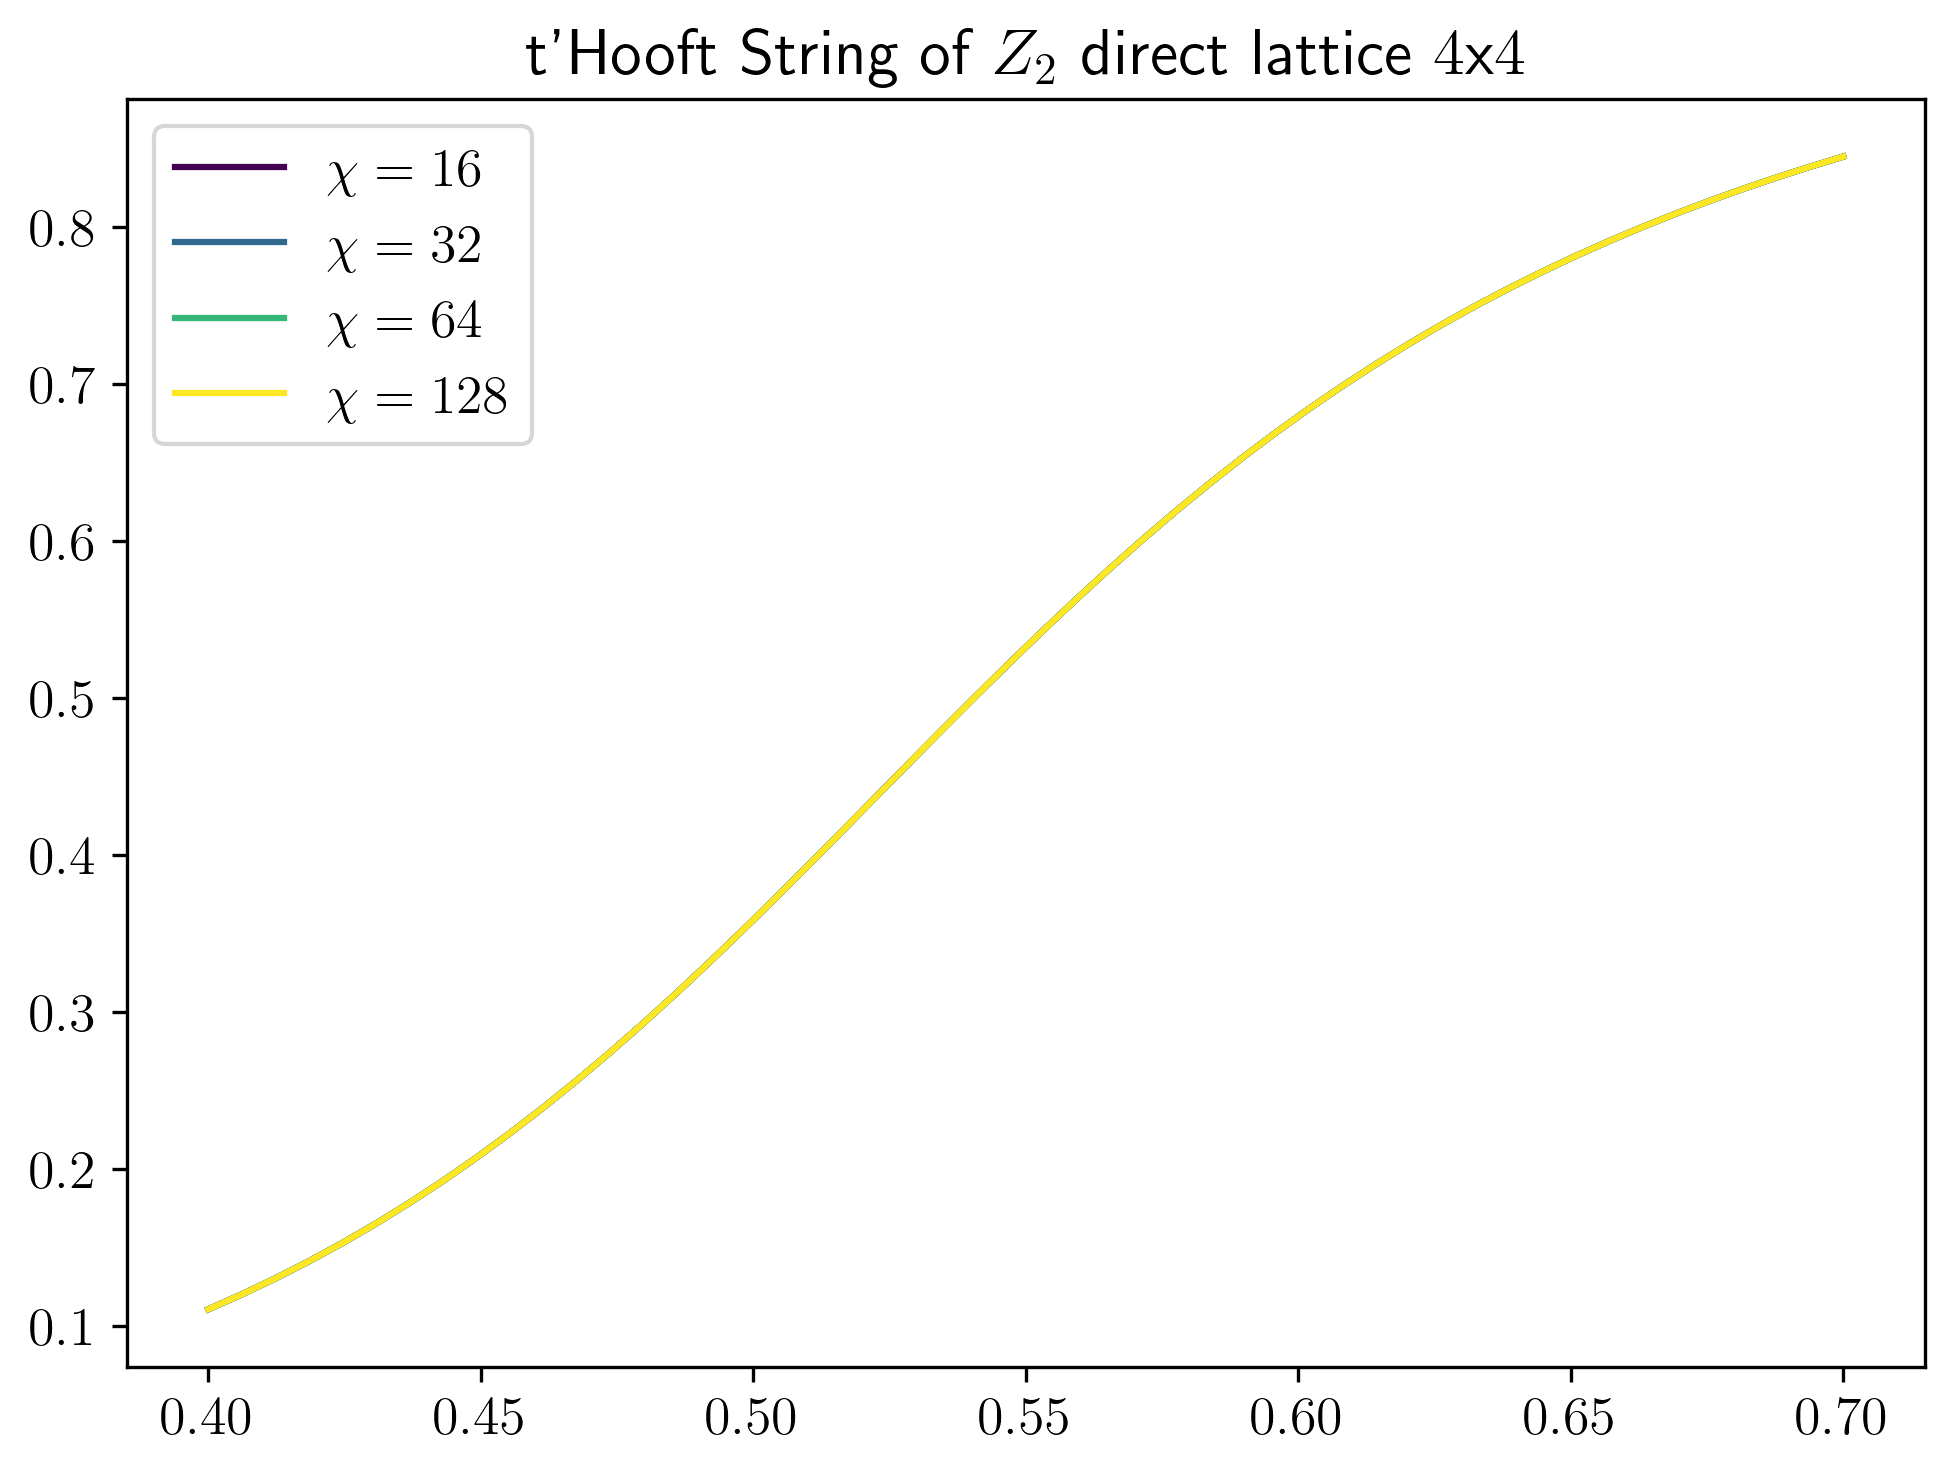

In [14]:
chis = [16,32,64,128]
L = 4
l = L
h_i = 0.4
h_f = 0.7
lx = 2
ly = 1
npoints = 50
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
strings = []
for i, chi in enumerate(chis):
    string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    strings.append(string)
    plt.plot(hs, string, color=colors[i], label=f"$\chi={chi}$")
plt.title(f"t'Hooft String of $Z_2$ direct lattice ${l}$x${L}$")
plt.legend();

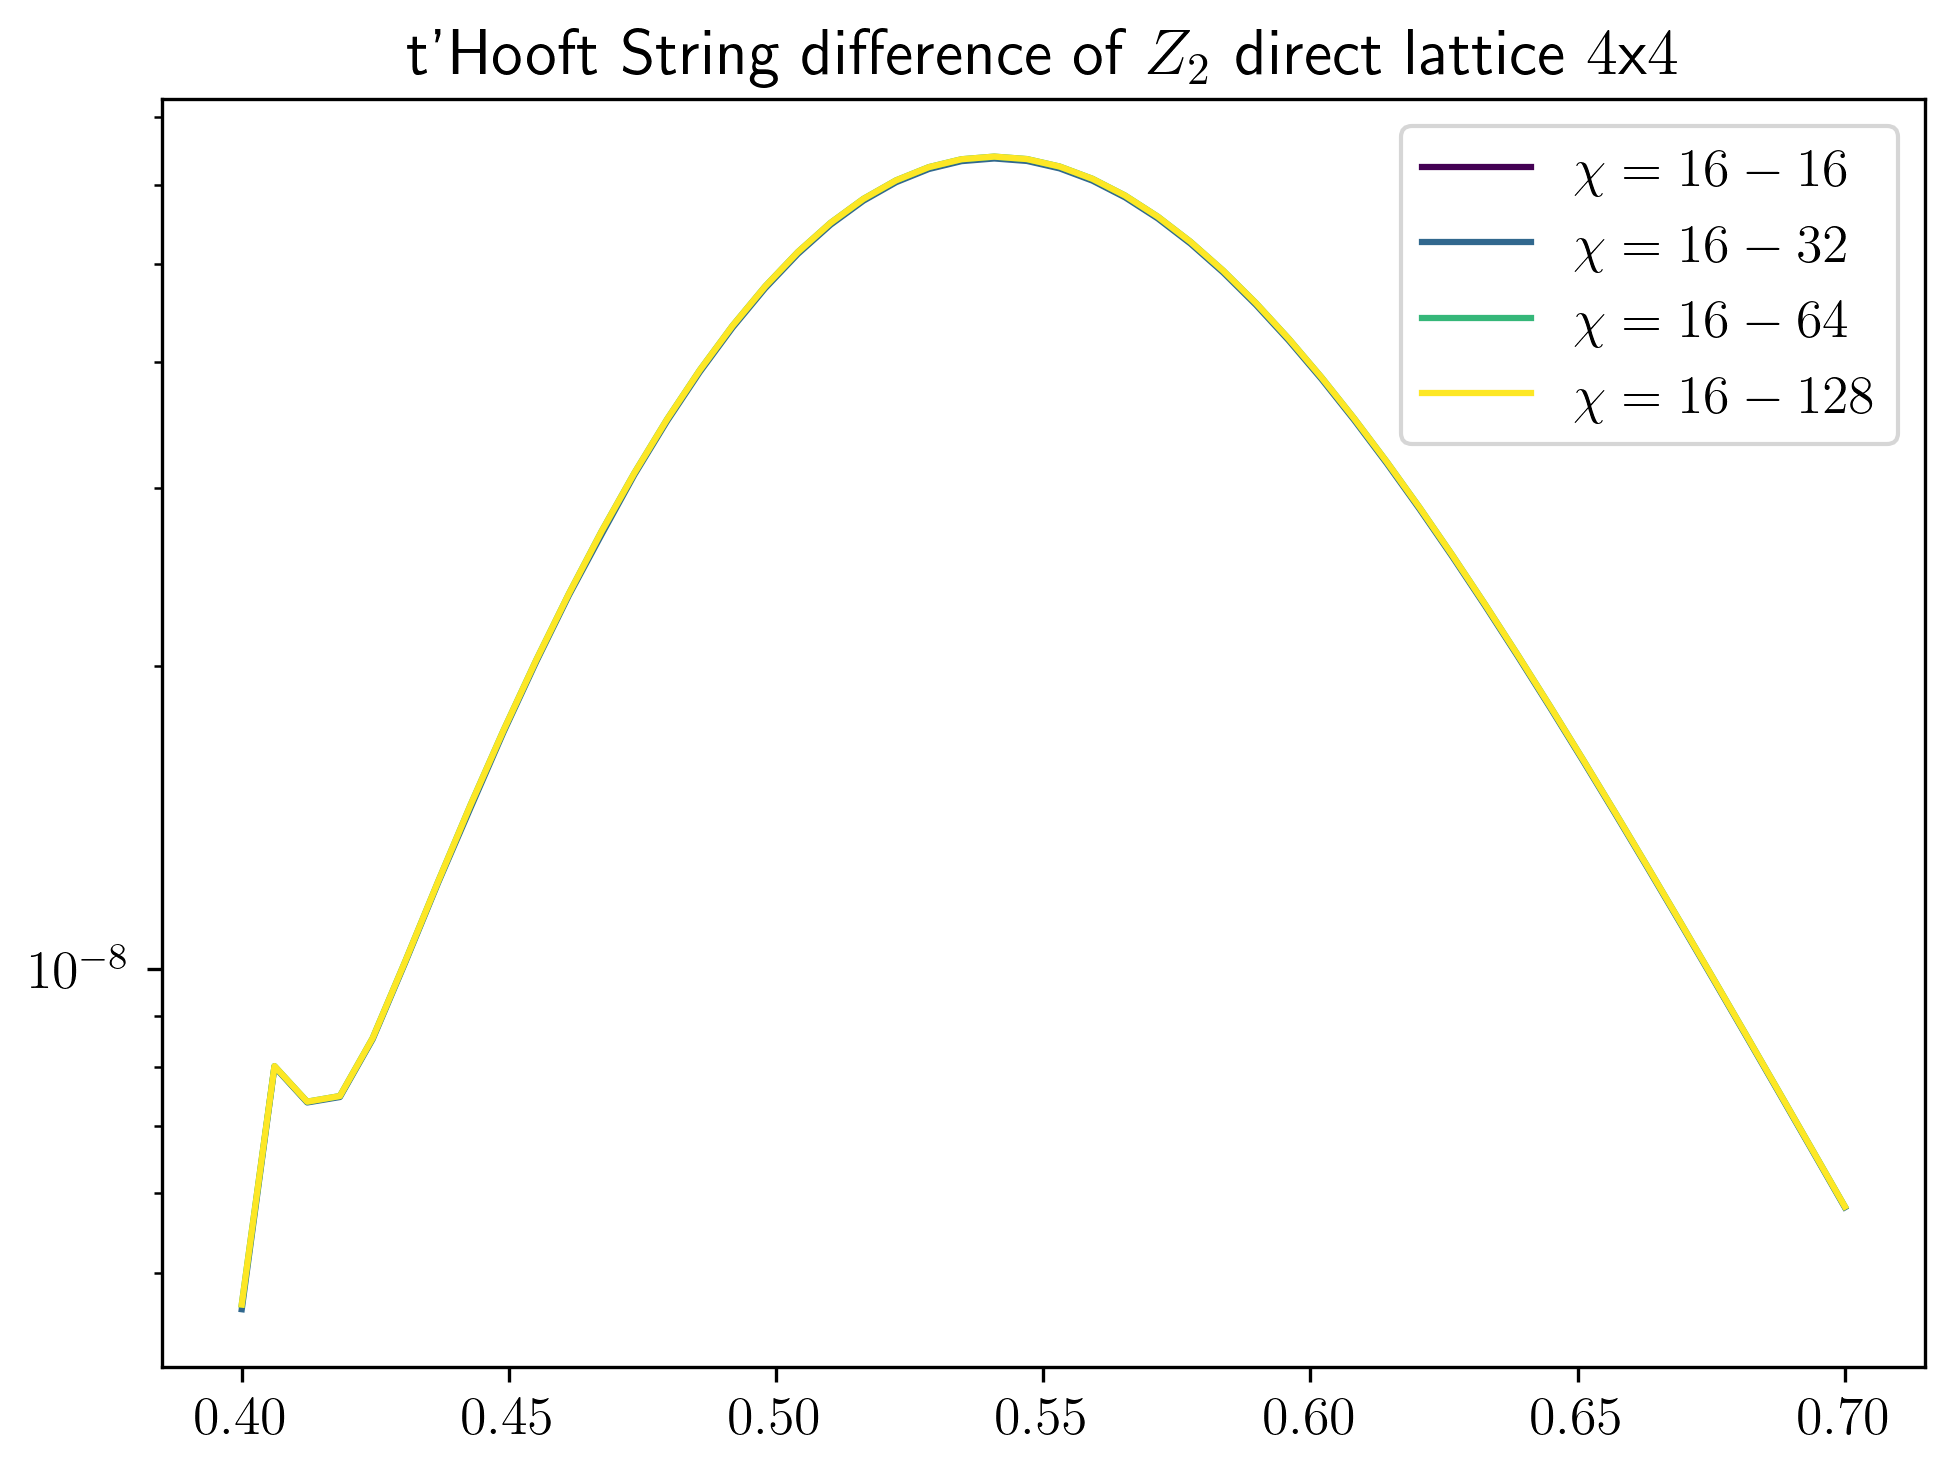

In [16]:
# plot difference between curves
for i, chi in enumerate(chis):
    diffs = np.abs(np.asarray(strings[0])-np.asarray(strings[i]))
    plt.plot(hs, diffs, color=colors[i], label=f"$\chi={chis[0]}-{chis[i]}$")
plt.title(f"t'Hooft String difference of $Z_2$ direct lattice ${l}$x${L}$")
plt.yscale('log')
plt.legend();

## Observables with different Lattice sizes

### 1. t'Hooft String

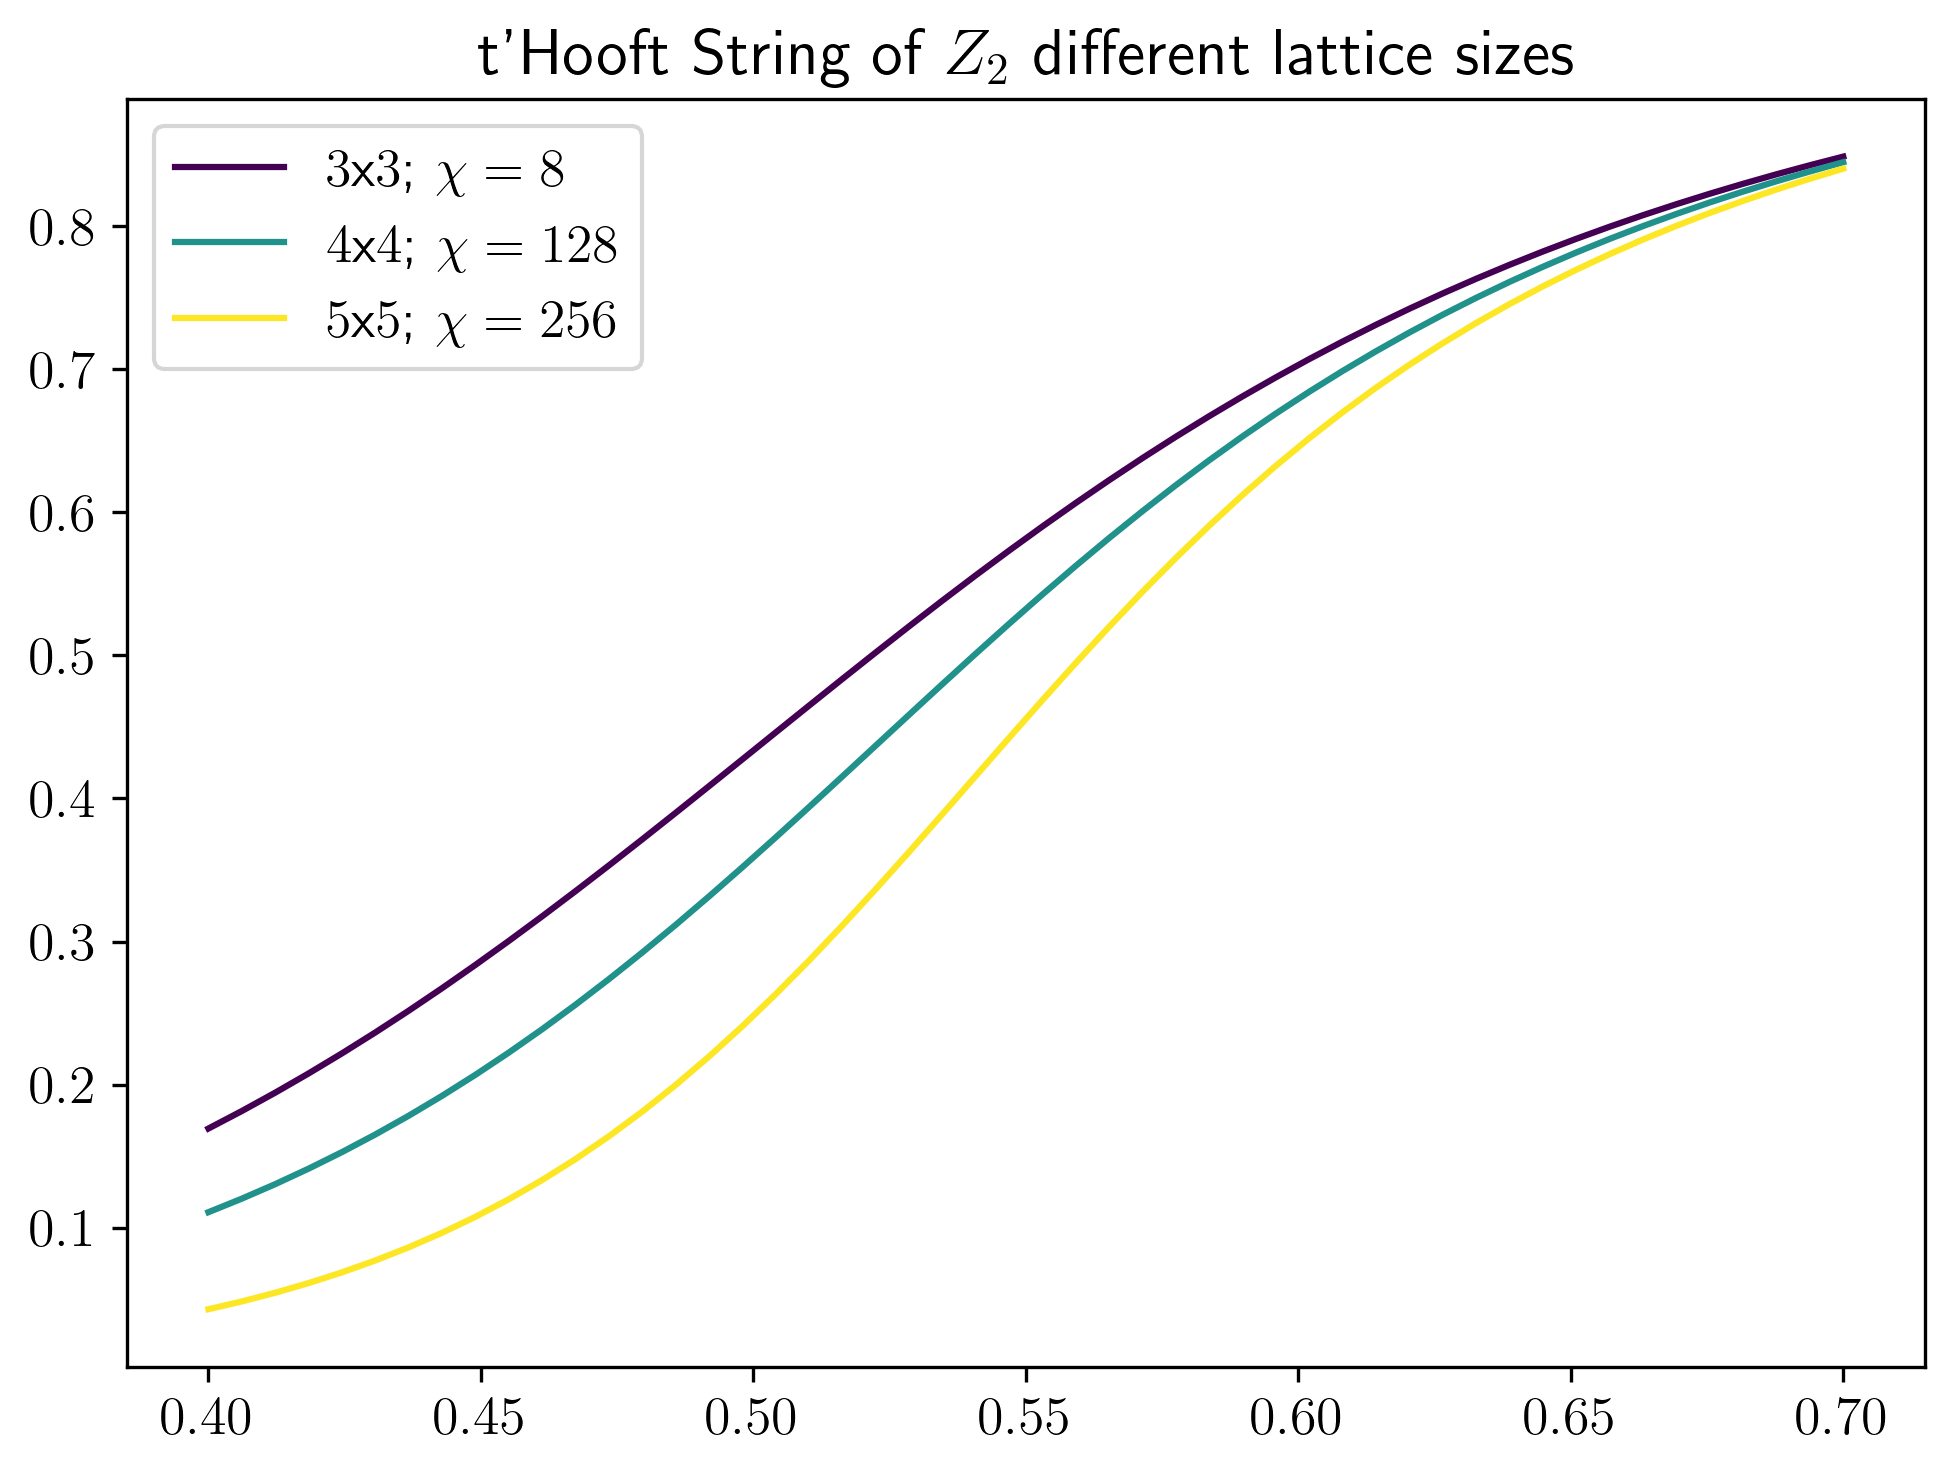

In [21]:
Ls = [3,4,5]
chis = [8,128,256]
h_i = 0.4
h_f = 0.7
lxs = [1,2,2]
lys = [1,1,2]
npoints = 50
hs = np.linspace(h_i,h_f,npoints)
# hs = np.logspace(h_i,h_f,npoints)
cx = None
cy = None
if cx == None:
    sector = "vacuum_sector"
else:
    sector = f"{len(cx)}_particle(s)_sector"
parent_path="/Users/fradm98/Google Drive/My Drive/projects/1_Z2"

colors = create_sequential_colors(len(chis))
i = 0
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    plt.plot(hs, string, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1

plt.title(f"t'Hooft String of $Z_2$ different lattice sizes")
plt.legend();

### Extracting $\gamma$ from $g_c$ and $\nu$ with a $Log$ law

We know that:
$$ \frac{dM}{dh}|_{h_{max}} \sim |h_c(L)-h_c(\infty)|^{-\gamma} \sim L^{\frac{\gamma}{\nu}}$$
where the derivative of the magnetization represents the susceptibility and the $\gamma$ *critical exponent* can be found with two formulas. We can try both to see if we got the same results or we can average the two.  
1. In one formula we use the experimental value of $h_c^{exp}=3.11$ in the termodynamic limit and the critical point for finite sizes $L$:
$$ \log(\frac{dM}{dh}|_{h_{max}}) = \log(c |h_c(L)-h_c(\infty)|^{-\gamma})=\log(c)-\gamma \log(|h_c(L)-h_c(\infty)|) $$
2. The other one uses the exact values of the different used sizes $L$ and the experimental value of $\nu_{exp} = 0.42$:
$$ \log(\frac{dM}{dh}|_{h_{max}}) = \log(cL^{\frac{\gamma}{\nu}})= \log(c)+\frac{\gamma}{\nu}\log(L)$$

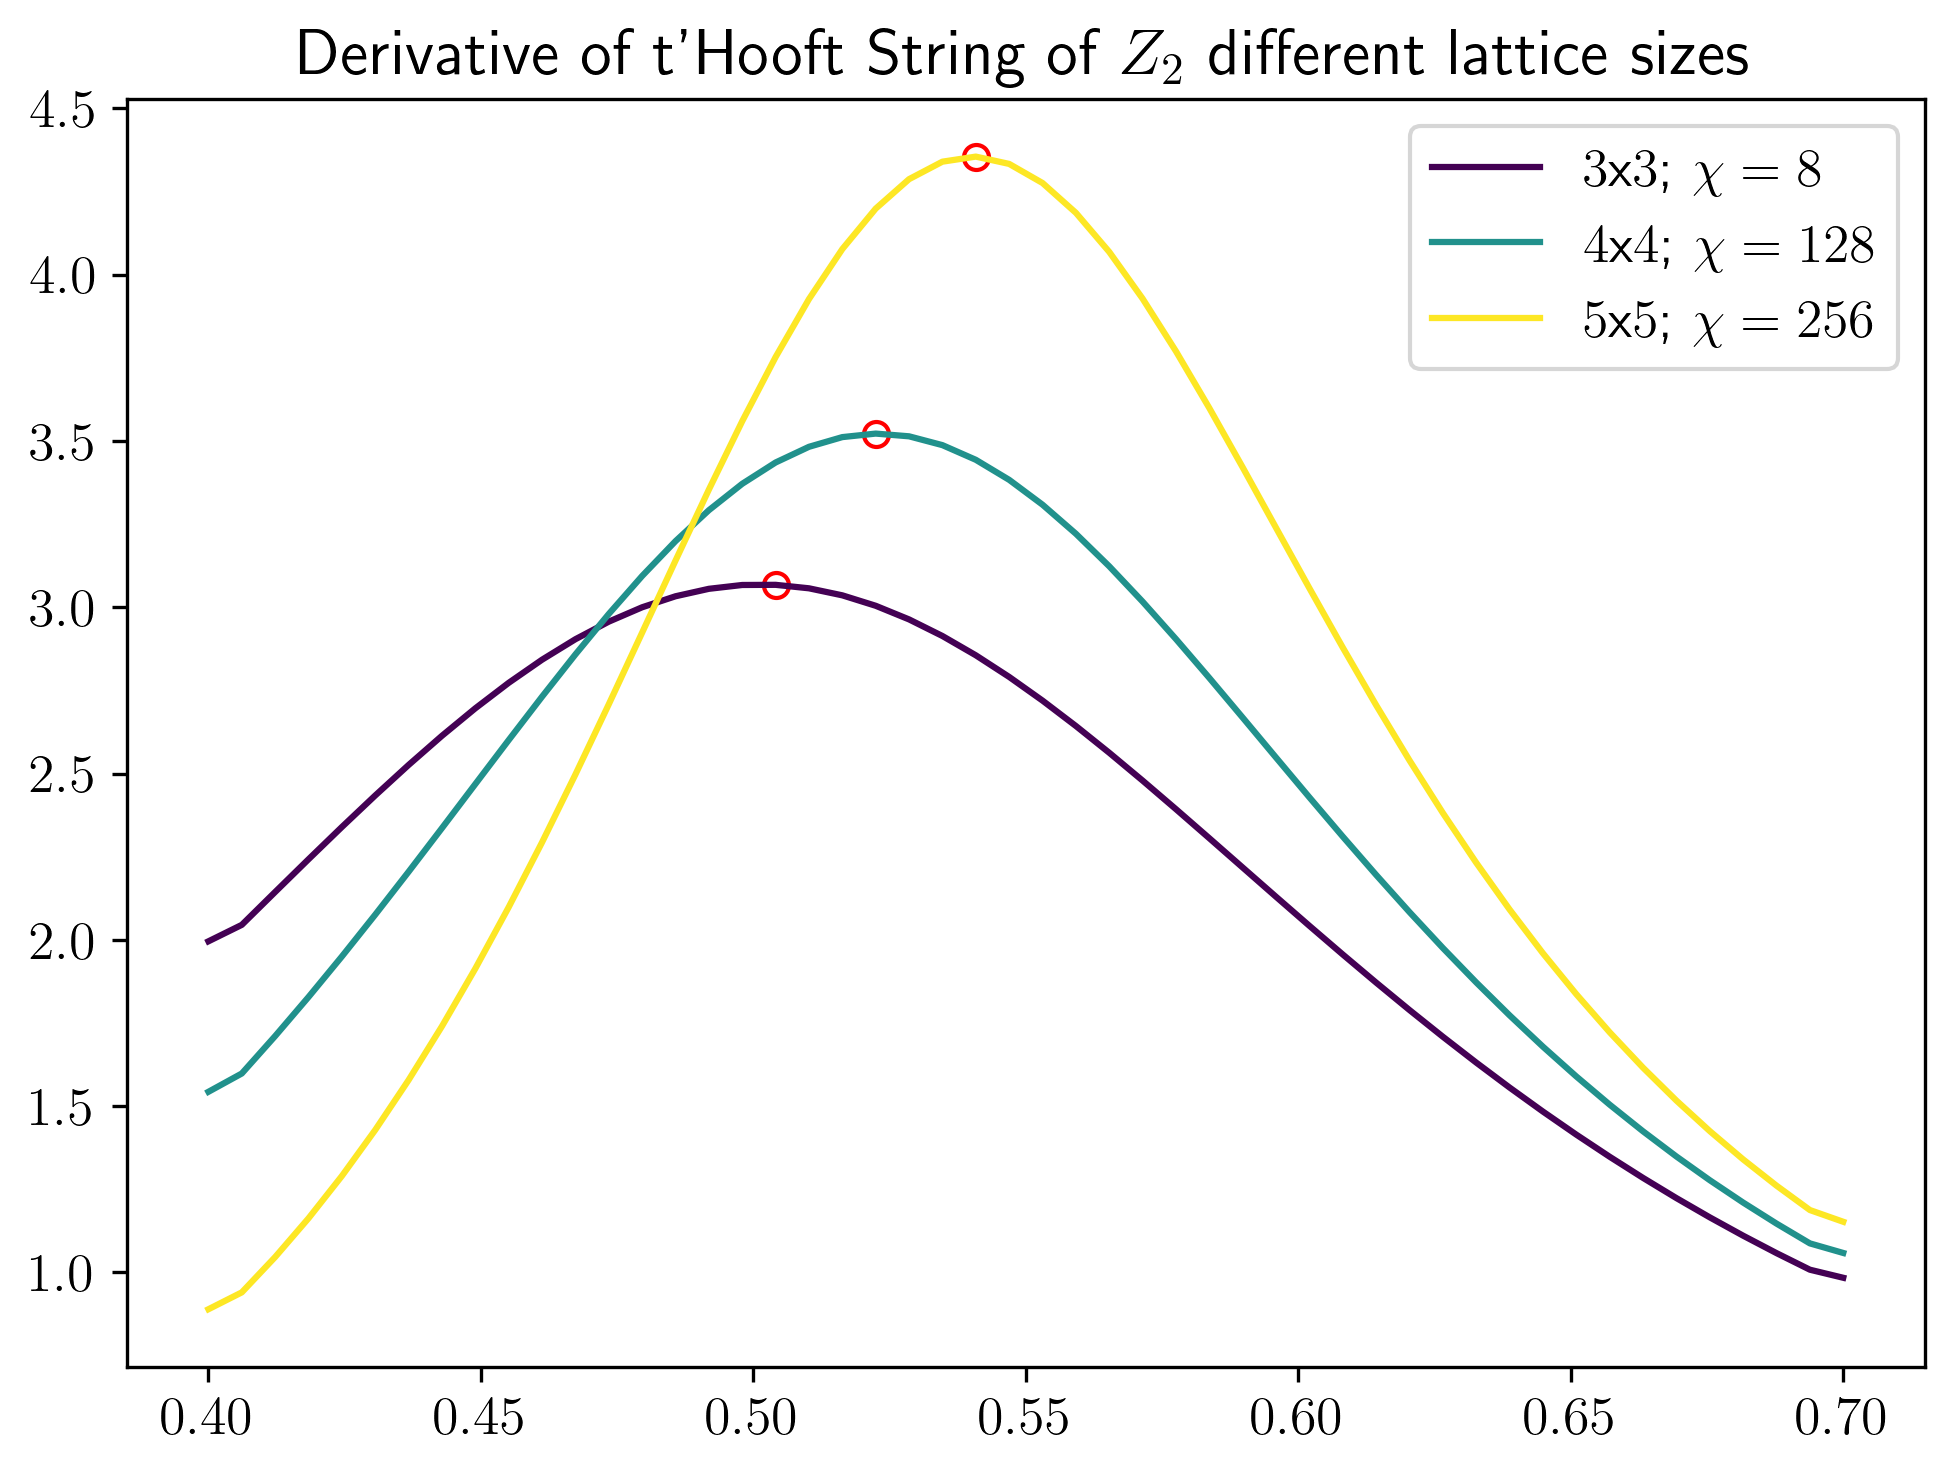

In [32]:
colors = create_sequential_colors(len(chis))
i = 0
max_vals = []
x_vals = []
for L, chi, lx, ly in zip(Ls, chis, lxs, lys):
    l = L
    string = np.load(f"{parent_path}/results/thooft/thooft_string_first_moment_{lx}-{ly}_horizontal_Z2_dual_direct_lattice_{l}x{L}_{sector}_{cx}-{cy}_h_{h_i}-{h_f}_delta_{npoints}_chi_{chi}.npy")
    d_string_dh = np.gradient(string, hs)
    idx_max = np.argmax(d_string_dh)
    max_vals.append(np.max(d_string_dh))
    x_vals.append(hs[idx_max])
    plt.plot(hs, d_string_dh, color=colors[i], label=f"${l}$x${L}$; $\chi={chi}$")
    i += 1
plt.scatter(x_vals, max_vals, marker='o', facecolors="white", edgecolors="red")
plt.title(f"Derivative of t'Hooft String of $Z_2$ different lattice sizes")
plt.legend();

In [34]:
def lin_law(x,a,b):
    return a*x+b

def power_law(L, a, b, c):
    return a + b*(L**c)

x_data = Ls
y_data = x_vals
popt_power, copt_power = curve_fit(power_law, x_data, y_data, maxfev=5000)
print(f"the nu: {-1/popt_power[2]}")
print(f"the gc: {popt_power[0]}")

# first method
x_data = np.log(np.abs(np.asarray(x_vals)-0.5489))
y_data = np.log(np.abs(max_vals))

popt_log_1, copt_log_1 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {-popt_log_1[0]}")

# second method
x_data = np.log(Ls)
y_data = np.log(np.abs(max_vals))

popt_log_2, copt_log_2 = curve_fit(lin_law, x_data, y_data)
print(f"The gamma is: {popt_log_2[0]*(-1/popt_power[2])}")

the nu: -1.0000000000000078
the gc: 0.4489795918367342
The gamma is: 0.20029488498666895
The gamma is: -0.6763721412103079


/Users/fradm98/opt/anaconda3/envs/mps/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


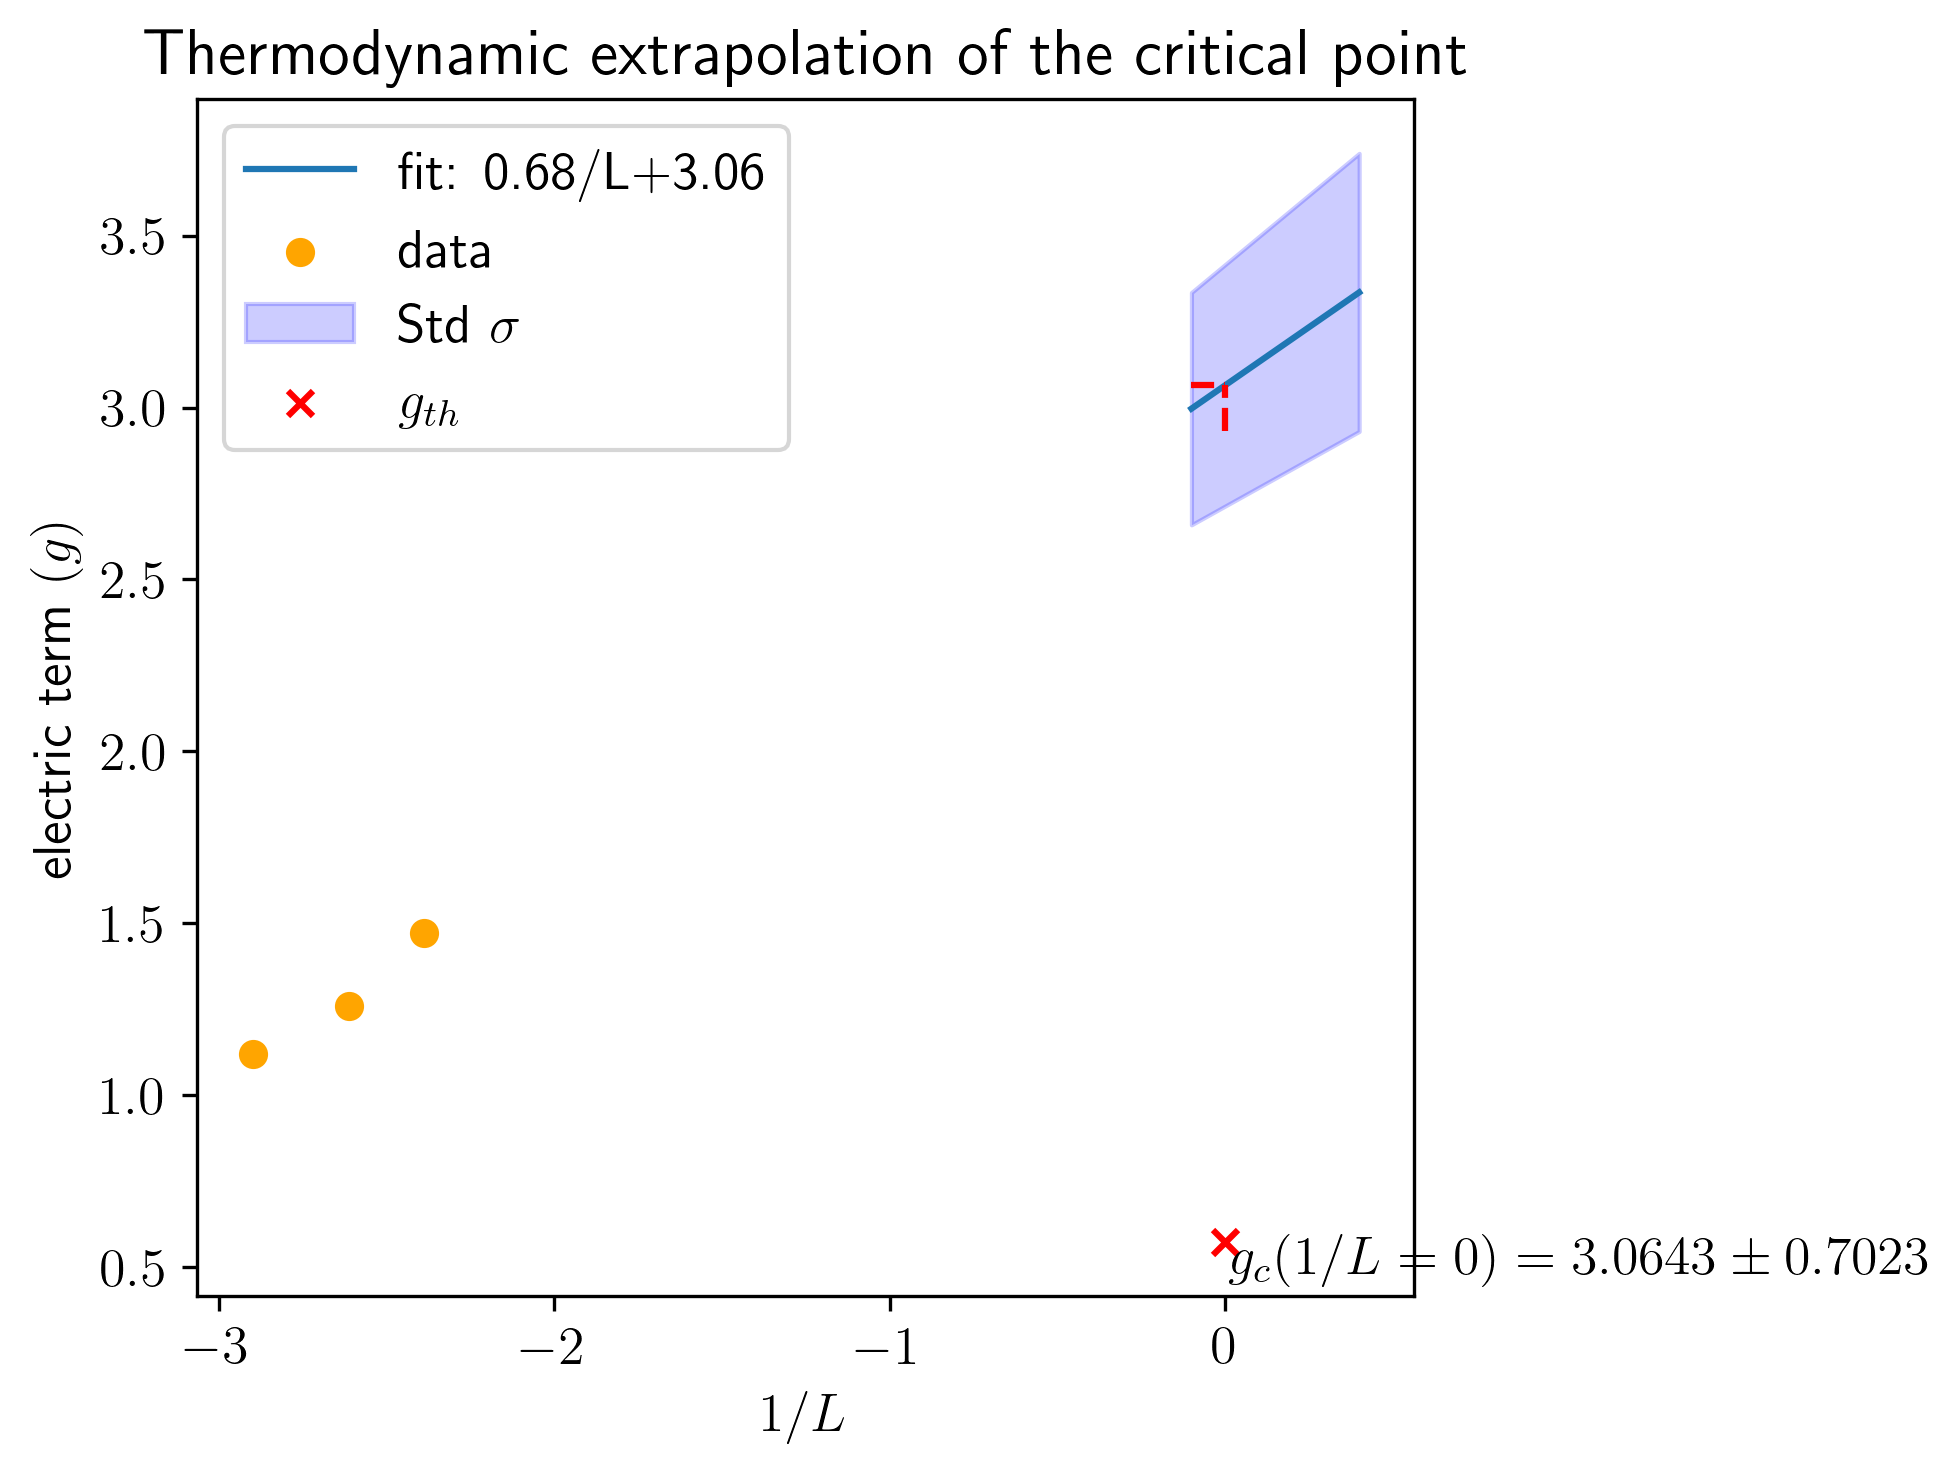

In [30]:
entr_max = []
idx_max = []
Ls_inv = [1/3,1/4,1/5]

x_data = np.log(np.abs(x_vals-popt_power[0]))
y_data = np.log(np.abs(max_vals))

p_opt, c_opt = curve_fit(lin_law, x_data, y_data)

h_th = 1/np.sqrt(3.044)
xs = np.linspace(-0.1,0.4,50)
y_fit = lin_law(xs, p_opt[0], p_opt[1])
err = np.sqrt(np.diag(c_opt))
y_err_plus = lin_law(xs, p_opt[0]+err[0], p_opt[1]+err[1])
y_err_minus = lin_law(xs, p_opt[0]-err[0], p_opt[1]-err[1])
plt.title("Thermodynamic extrapolation of the critical point")
plt.plot(xs, y_fit, label=f'fit: {round(p_opt[0],2)}/L+{round(p_opt[1],2)}')
plt.scatter(x_data, y_data, color='orange', label='data')
h_c = round(lin_law(x=0,a=p_opt[0],b=p_opt[1]),4)
h_c_err_plus = round(lin_law(x=0,a=p_opt[0]+err[0],b=p_opt[1]+err[1]),4)
h_c_err_minus = round(lin_law(x=0,a=p_opt[0]-err[0],b=p_opt[1]-err[1]),4)
h_c_err = round(h_c_err_plus - h_c_err_minus, 4)
plt.text(x=0.01, y=0.48, s=f"$g_c(1/L=0)={h_c}\pm{h_c_err}$")
plt.hlines(y=h_c, xmin=xs[0], xmax=0, linestyles='--', colors='red')
plt.vlines(x=0, ymin=y_err_minus[-1], ymax=h_c, linestyles='--', colors='red')
plt.fill_between(xs, y_err_minus, y_err_plus, color='blue', alpha=0.2, label='Std $\sigma$')
plt.scatter([0], [h_th], marker='x', color='red', label='$g_{th}$')
plt.xlabel("$1/L$")
plt.ylabel("electric term $(g)$")

plt.legend()
plt.show();

### 2. Binder's Cumulant